In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# TODO

* Cambiar os valores de A para que tamen teñas negativos
* Nos quedamos con 2, 8, 16, 32, 256
* Tenemos que hacer lo de los ints
* Y cambiar el acceso a memoria


In [2]:
def leer_csv(filename: str) -> pd.DataFrame:

    pd.set_option('display.max_rows', None)
    df = pd.read_csv(filename, header=0)
    df.columns = ['N', 'ck']
    return df

In [3]:

def avg_of_best(df: pd.DataFrame) -> pd.DataFrame:

    data = []
    for d in df['D'].unique():
        for l in df['L'].unique():
            # Media geométrica de los 3 accesos más rapidos 
            ck_avg = df.loc[(df['D'] == d) & (df['L'] == l)] \
            	.nsmallest(3, 'Ck_per_Access')['Ck_per_Access'] \
            	.prod()**(1/3)
            data.append([d, l, ck_avg])
            
    return pd.DataFrame(data, columns=['D', 'L', 'Ck'])

In [4]:
# Saves all graphs
def graph_data(df: pd.DataFrame, type_of_graph: str) -> None:
    
    for d in df['D'].unique():
        fig, ax = plt.subplots()
        
        l_values = [str(i) for i in df.loc[df['D']==d]['L'].values]
        ck_values = list(df.loc[df['D']==d]['Ck'].values)
        
        ax.bar(l_values, ck_values) # Crea la grafica
        ax.set_ylabel('Ciclos de reloj por acceso')
        ax.set_title(f'Valor de D: {d}')
        
        # Guarda las graficas
        plt.savefig(f'data/{type_of_graph}/graphs/graph_{type_of_graph}{d}.png')

# Crear Gráficas Básicas

In [5]:
v1_0 = leer_csv('results/results/version1_o0.csv')
v1_2 = leer_csv('results/results/version1_o2.csv')
v1_3 = leer_csv('results/results/version1_o3.csv')
v2_0 = leer_csv('results/results/version2_o0.csv')
v3_0 = leer_csv('results/results/version3_o0.csv')
v4_0 = leer_csv('results/results/version4_o0.csv')
v4_0_dynamic = leer_csv('results/results/version4_o0_dynamic.csv')
v4_0_guided = leer_csv('results/results/version4_o0_guided.csv')
v4_0_collapse = leer_csv('results/results/version4_o0_collapse.csv')

In [6]:
# HILOS
v4_h4 = leer_csv('results/hilos/v4_h4.csv')
v4_h8 = leer_csv('results/hilos/v4_h8.csv')
v4_h16 = leer_csv('results/hilos/v4_h16.csv')
v4_h32 = leer_csv('results/hilos/v4_h32.csv')
v4_h64 = leer_csv('results/hilos/v4_h64.csv')

v4_h4

,N,ck
0,250,1429856.0
1,500,5000804.0
2,750,10852670.0
3,1000,17849002.0
4,1500,39782978.0
5,2000,69603726.0
6,2550,113156884.0
7,3000,156396052.0


# Crear Gráficas Agrupadas
* Grupos en función de la L para cada tipo de gráfica
* Gráficas para comparar distintos tipos

## Formato de los datos a darle a las gráficas
{

	Valores de N, numero de cilos
    
}

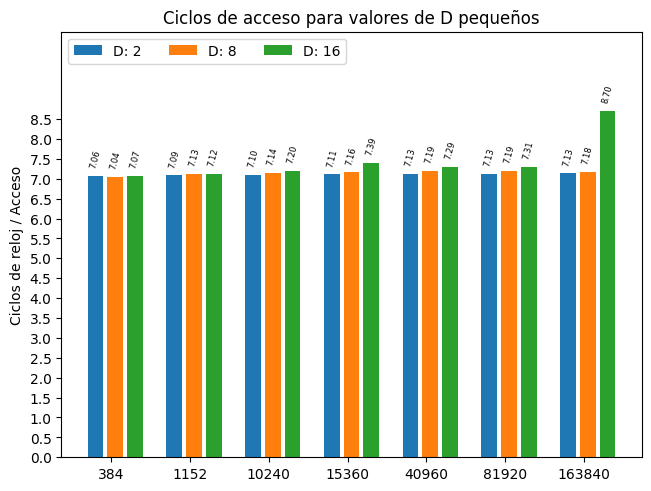

In [264]:
# the label locations
x = np.arange(len(l_values))

# the width of the bars
width = 0.2

# Para la separación entre barras del mismo grupo
multiplier = 0

# Crear las gráficas (ni idea del layout)
fig, ax = plt.subplots(layout='constrained')

ck_max = 0;
for d in d_values_small:
    
    # Tupla de ck
    ck_values = tuple(df.loc[df['D']==d]['Ck'].values)
    
    if max(ck_values) > ck_max:
        ck_max = max(ck_values)
    
    # Separación entre barras del mismo grupo
    offset = width * multiplier
    
    # Barras
    # Esta o importante
    rects = ax.bar(x + offset, ck_values, width, label=f"D: {d}")
    
    # Etiquetas encima de las barras
    ax.bar_label(rects, padding=5, fmt="%.2f", rotation=75, fontsize=6)
    
    # Offset de cada tupla
    multiplier += 1.25

y_index = np.arange(0.0, ck_max, 0.5)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Ciclos de acceso para valores de D pequeños')
ax.set_ylabel('Ciclos de reloj / Acceso')
ax.set_yticks(y_index, )
ax.set_xticks(x + width, l_values)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, ck_max+2)

# plt.show()
# plt.savefig(f'data/{type_of_graph}/graphs/graph_{type_of_graph}_smallD.png')
#plt.savefig(f'data/double/graphs/graph_double_smallD.png')

In [38]:
def graph_two (d1: pd.DataFrame, d2: pd.DataFrame, v1: str, v2: str) -> None:

    # the label locations
    x = np.arange(len(d1['N'].unique()))

    ## ESTETICA
    # the width of the bars
    width = 0.3

    # Para la separación entre barras del mismo grupo
    multiplier = 0
    ## FIN ESTETICA

    # Crear las gráficas (ni idea del layout)
    fig, ax = plt.subplots(layout='constrained')

    ck_max = 0;

    ### Grafica 1
    # Tupla de ck
    ck_values = tuple(d1['ck'].values)

    if max(ck_values) > ck_max:
        ck_max = max(ck_values)

    # Separación entre barras del mismo grupo
    offset = width * multiplier

    # Barras
    # Esta o importante
    rects = ax.bar(x + offset, ck_values, width, label=f"Version: {v1}")

    # Etiquetas encima de las barras
    #ax.bar_label(rects, padding=3, fmt="%.1E", fontsize=6)

    # Offset de cada tupla
    multiplier += 1.25

    ## Grafica 2
    # Tupla de ck
    ck_values = tuple(d2['ck'].values)

    if max(ck_values) > ck_max:
        ck_max = max(ck_values)

    # Separación entre barras del mismo grupo
    offset = width * multiplier

    # Barras
    # Esta o importante
    rects = ax.bar(x + offset, ck_values, width, label=f"Version: {v2}")

    # Etiquetas encima de las barras
    #ax.bar_label(rects, padding=3, fmt="%.1E", fontsize=6)


    ### FINISHED CREATING GRAPHS
    y_index = np.arange(0.0, ck_max, 100000000)
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_title('Ciclos de acceso para valores de D elevados')
    ax.set_ylabel('Ciclos de reloj / Acceso')
    ax.set_yticks(y_index, )
    ax.set_xticks(x + width, tuple(d1['N'].values))
    ax.legend(loc='upper left', ncols=3)
    plt.show()

    plt.savefig(f'results/graphs/graph_{v1}_{v2}.png')

In [44]:
v3_0

,N,ck
0,250,
1,500,27411574.00
2,750,61218440.00
3,1000,105968638.00
4,1500,
5,2000,426306222.00
6,2550,695515206.00
7,3000,


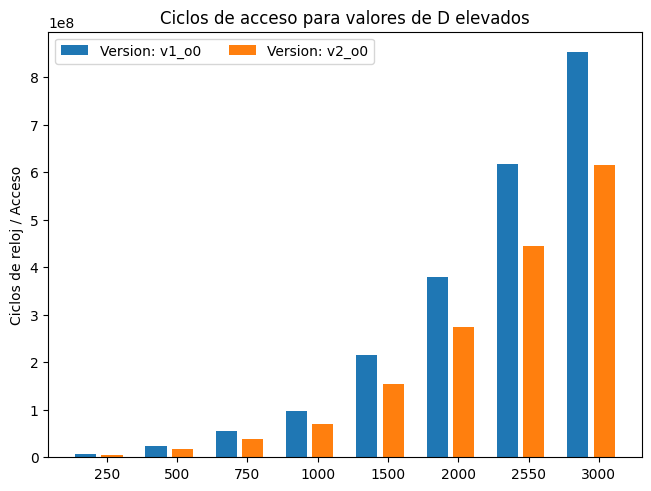

TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'

<Figure size 640x480 with 0 Axes>

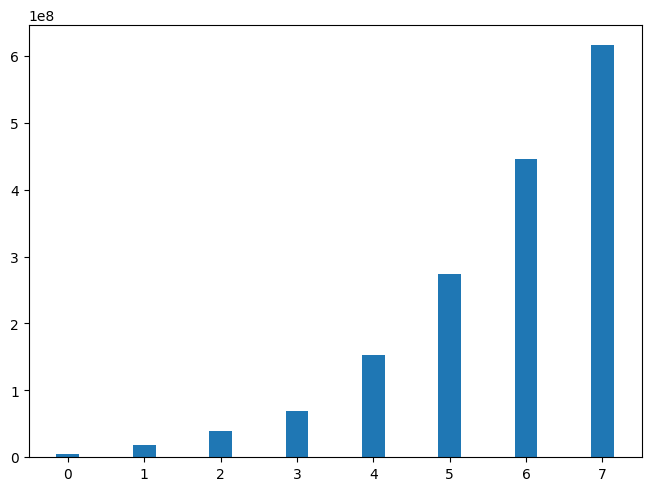

In [40]:
graph_two(v1_0, v2_0, "v1_o0", "v2_o0")
graph_two(v2_0, v3_0, "v2_o0", "v3_o0")
graph_two(v2_0, v4_0, "v2_o0", "v4_o0")

## Grafear 2

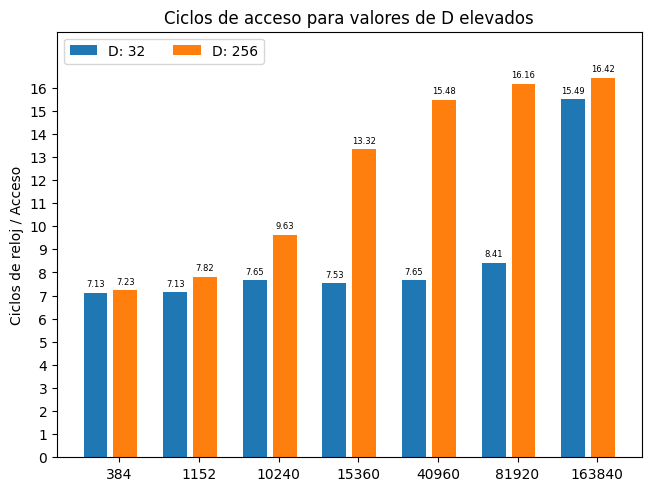

In [265]:
# the label locations
x = np.arange(len(l_values))

# the width of the bars
width = 0.3

# Para la separación entre barras del mismo grupo
multiplier = 0

# Crear las gráficas (ni idea del layout)
fig, ax = plt.subplots(layout='constrained')

ck_max = 0;
for d in d_values_big:
    
    # Tupla de ck
    ck_values = tuple(df.loc[df['D']==d]['Ck'].values)
    
    if max(ck_values) > ck_max:
        ck_max = max(ck_values)
    
    # Separación entre barras del mismo grupo
    offset = width * multiplier
    
    # Barras
    # Esta o importante
    rects = ax.bar(x + offset, ck_values, width, label=f"D: {d}")
    
    # Etiquetas encima de las barras
    ax.bar_label(rects, padding=3, fmt="%.2f", fontsize=6)
    
    # Offset de cada tupla
    multiplier += 1.25

y_index = np.arange(0.0, ck_max, 1)
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title('Ciclos de acceso para valores de D elevados')
ax.set_ylabel('Ciclos de reloj / Acceso')
ax.set_yticks(y_index, )
ax.set_xticks(x + width, l_values)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, ck_max+2)

#plt.show()
plt.savefig(f'data/double/graphs/graph_double_bigD.png')

# Crear Gráficas Comparativas

* Cogemos 2 D (8, 16)
* Representar: D1Double, D1Int, D2Double, D2Int para cada L

In [289]:

def graph_comparison(df1: pd.DataFrame, df2: pd.DataFrame, tp1: str, tp2: str) -> None:
    
    l_values = tuple(df1['L'].unique())
    d_values_comp = tuple(df1['D'].unique())[3:]
    
    # the label locations
    x = np.arange(len(l_values)*2) # porque tenemos dos graficas
    print(x)

    pos_double = np.arange(1.0, len(l_values)*2, 2)
    pos_int = np.arange(0.0, len(l_values)*2, 2)

    # the width of the bars
    width = 0.25

    # Para la separación entre barras del mismo grupo
    multiplier = 0

    # Crear las gráficas (ni idea del layout)
    fig, ax = plt.subplots(layout='constrained')

    ck_max = 0;
    for d in d_values_comp:

        # Tupla de ck
        ck1_values = tuple(df1.loc[df['D']==d]['Ck'].values)
        ck2_values = tuple(df2.loc[df['D']==d]['Ck'].values)

        if max(ck1_values) > ck_max:
            ck_max = max(ck1_values)

        if max(ck2_values) > ck_max:
            ck_max = max(ck2_values)

        # Separación entre barras del mismo grupo
        offset = width * multiplier        

        # Barras
        # Esta o importante

        rects1 = ax.bar(pos_int + offset, ck1_values, width, label=f"{tp1} D: {d}")

        rects2 = ax.bar(pos_int + offset + width + 0.09, ck2_values, width, label=f"{tp2} D: {d}")

        # Etiquetas encima de las barras
        ax.bar_label(rects1, padding=5, fmt="%.2f", fontsize=6, rotation=90)
        ax.bar_label(rects2, padding=5, fmt="%.4f", fontsize=6, rotation=90)

        # Offset de cada tupla
        multiplier += 2.6

    y_index = np.arange(0.0, ck_max, 1)
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_title(f'Comparativa entre {tp1} y {tp2}')
    ax.set_ylabel('Ciclos de reloj / Acceso')
    ax.set_yticks(y_index, )
    ax.set_xticks(pos_int + 0.5 + width/2, l_values)
    ax.legend(loc='upper left', ncols=2)
    ax.set_ylim(0, ck_max+2)

    plt.show()
    #plt.savefig(f'data/{tp1}/graphs/graph_compare_{tp1}_{tp2}.png')
    #plt.savefig(f'data/double/graphs/graph_compare_index_no_index.png')

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


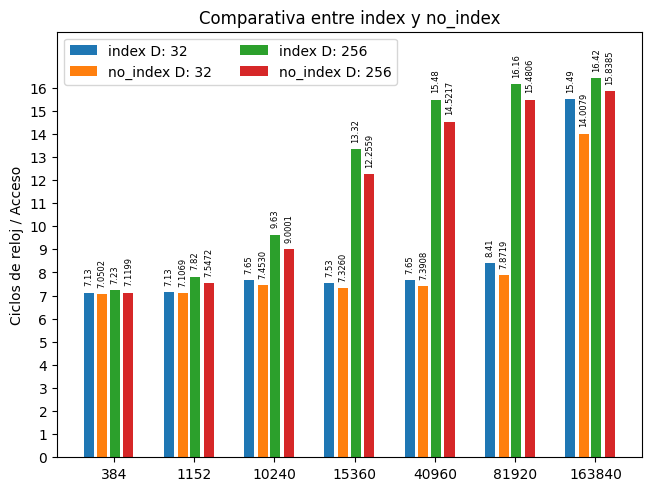

In [290]:
df_double = avg_of_best(leer_csv('data/double/ck_double.csv'))

df_int = avg_of_best(leer_csv('data/int/ck_int.csv'))

df_no_index = avg_of_best(leer_csv('data/no_index/ck_no_index.csv'))

graph_comparison(df_double, df_no_index, "index", "no_index")
#graph_comparison(df_double, df_int, "double", "int")